<a href="https://colab.research.google.com/github/shanksghub/FootballStats/blob/master/New%20york%20stock%20lstm%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [52]:
prices_dataset =  pd.read_csv('/prices.csv', header=0,error_bad_lines = False )


b'Skipping line 17783: expected 7 fields, saw 8\nSkipping line 53220: expected 7 fields, saw 9\nSkipping line 88517: expected 7 fields, saw 8\nSkipping line 105999: expected 7 fields, saw 8\n'
b'Skipping line 141290: expected 7 fields, saw 9\nSkipping line 176567: expected 7 fields, saw 8\nSkipping line 211802: expected 7 fields, saw 8\nSkipping line 229387: expected 7 fields, saw 8\n'
b'Skipping line 264552: expected 7 fields, saw 9\nSkipping line 299607: expected 7 fields, saw 8\nSkipping line 369689: expected 7 fields, saw 9\n'
b'Skipping line 404842: expected 7 fields, saw 10\nSkipping line 422388: expected 7 fields, saw 10\nSkipping line 492537: expected 7 fields, saw 9\n'
b'Skipping line 527484: expected 7 fields, saw 9\nSkipping line 579873: expected 7 fields, saw 13\n'
b'Skipping line 735854: expected 7 fields, saw 12\n'
b'Skipping line 787479: expected 7 fields, saw 10\nSkipping line 821801: expected 7 fields, saw 9\nSkipping line 873085: expected 7 fields, saw 9\nSkipping lin

In [53]:
yahoo = prices_dataset[prices_dataset['symbol']=='WLTW']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(251, 1)
yahoo_stock_prices.shape

(251, 1)

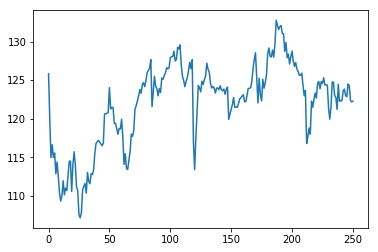

In [54]:
plt.plot(yahoo_stock_prices)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


compilation time :  0.026947736740112305
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 188 samples, validate on 10 samples
Epoch 1/10
188/188 [==============================] - 2s 11ms/step - loss: 0.3413 - val_loss: 0.7211
Epoch 2/10
188/188 [==============================] - 0s 159us/step - loss: 0.3019 - val_loss: 0.6640
Epoch 3/10
188/188 [==============================] - 0s 138us/step - loss: 0.2728 - val_loss: 0.6088
Epoch 4/10
188/188 [==============================] - 0s 122us/step - loss: 0.2454 - val_loss: 0.5553
Epoch 5/10
188/188 [==============================] - 0s 129us/step - loss: 0.2194 - val_loss: 0.5026
Epoch 6/10
188/188 [==============================] - 0s 123us/step - loss: 0.1941 - val_loss: 0.4521
Epoch 7/10
188/188 [==============================] - 0s 127us/step - loss: 0.1703 - val_loss: 0.4028
Epoch 8/10
188/188 [==============================] - 0s 134us/step - loss: 0.1482 - val_loss: 0.3547
Epoc

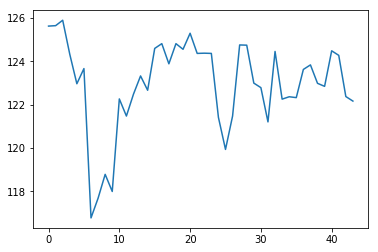

In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        b = dataset[i+look_back,0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

def plot_results_multiple(predicted_data, true_data, length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
def predict_sequences_multiple(model, firstValue, length):
    prediction_seqs = []
    curr_frame = firstValue

    for i in range(length):
        predicted = []

        predicted.append(model.predict(curr_frame[newaxis, :, :])[0, 0])

        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i + 1, predicted[-1], axis=0)

        prediction_seqs.append(predicted[-1])

    return prediction_seqs
predict_length = 5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
plot_results_multiple(predictions, testY, predict_length)
